In [133]:
import cv2
import numpy as np
import glob
import os
import pywt
import matplotlib.pyplot as plt

In [134]:
# Function for Wavelet Denoising
def wavelet_denoising(image, wavelet='db1', level=1):
    # Convert image to grayscale if needed
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    coeffs = pywt.wavedec2(image, wavelet, level=level)
    # Zeroing out all detail coefficients (you may want to modify this)
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 1  # Instead of zeroing out, consider applying a threshold
    image_denoised = pywt.waverec2(coeffs_H, wavelet)
    image_denoised = np.clip(image_denoised, 0, 255).astype(np.uint8)
    return image_denoised

In [135]:
# Function for Adaptive Multi-Scale Retinex (AMSR)
def apply_amsr(image, scales=[70, 110, 120], scale_weights=[0.9, 0.5, 0.9], gain=128, offset=128):
    img_float = image.astype(np.float32) + 5.0
    retinex = np.zeros_like(img_float)
    for scale, weight in zip(scales, scale_weights):
        blur = cv2.GaussianBlur(img_float, (0, 0), scale)
        retinex += weight * (np.log10(img_float) - np.log10(blur + 1.0))
    retinex = gain * retinex + offset
    retinex = np.clip(retinex, 0, 255).astype(np.uint8)
    return retinex

In [136]:
from skimage.metrics import structural_similarity as ssim

def calculate_ssim(original, enhanced):
    return ssim(original, enhanced, data_range=255)

In [137]:
# Function to display images in 3 columns
def display_images_3col(original, wavelet, wavelet_amsr):
    plt.figure(figsize=(15, 5))
    
    # Original Image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')
    
    # Wavelet Denoising Image
    plt.subplot(1, 3, 2)
    plt.imshow(wavelet, cmap='gray')  # Ensure grayscale visualization
    plt.title('Wavelet Denoising')
    plt.axis('off')
    
    # Wavelet Denoising + AMSR Image
    plt.subplot(1, 3, 3)
    plt.imshow(wavelet_amsr, cmap='gray')  # Ensure grayscale visualization
    plt.title('Wavelet Denoising + AMSR')
    plt.axis('off')
    
    plt.show()

In [138]:
# Direktori gambar dan output
input_dir = 'C:/kuliah/semester 7/datmin/perbaikan citra/data/'
output_dir = 'C:/kuliah/semester 7/datmin/perbaikan citra/output/'

In [139]:
# Membuat direktori output jika belum ada
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

PSNR for COVID-01.png (Wavelet Denoising): 31.76 dB
PSNR for COVID-01.png (Wavelet Denoising + AMSR): 14.91 dB


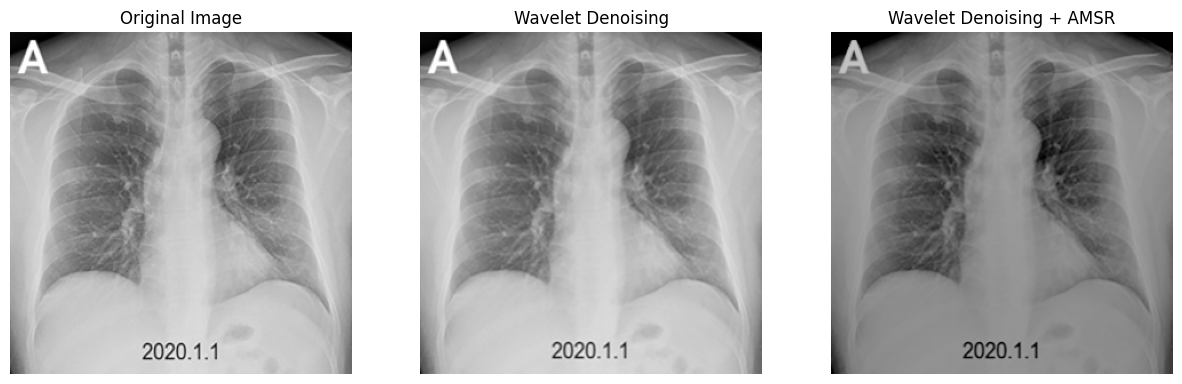

PSNR for COVID-02.png (Wavelet Denoising): 36.42 dB
PSNR for COVID-02.png (Wavelet Denoising + AMSR): 16.02 dB


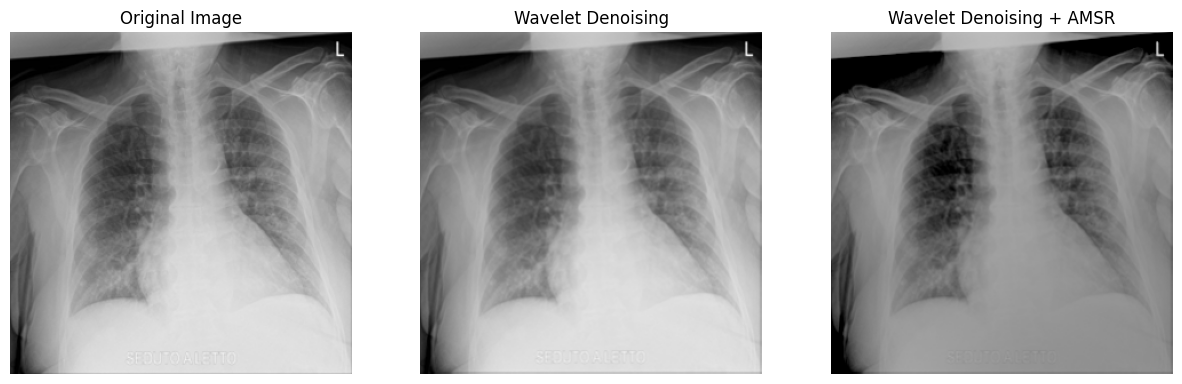

PSNR for COVID-03.png (Wavelet Denoising): 38.33 dB
PSNR for COVID-03.png (Wavelet Denoising + AMSR): 17.27 dB


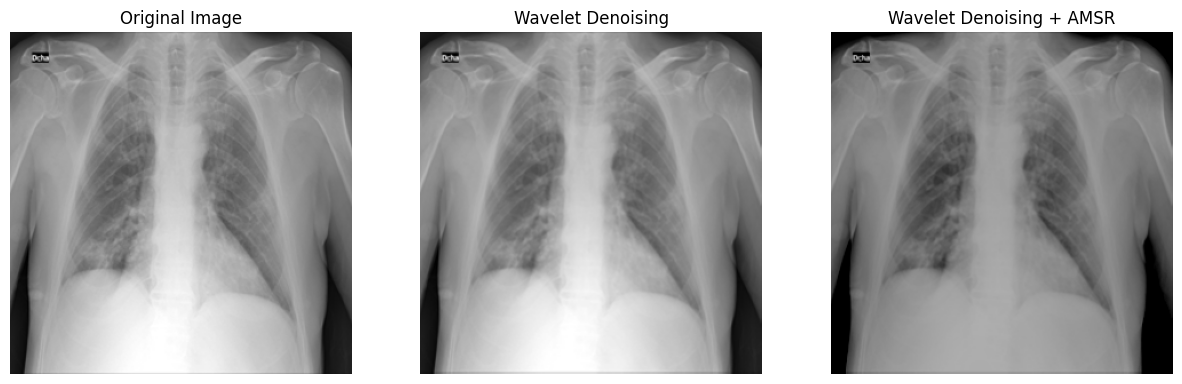

PSNR for COVID-04.png (Wavelet Denoising): 32.19 dB
PSNR for COVID-04.png (Wavelet Denoising + AMSR): 23.43 dB


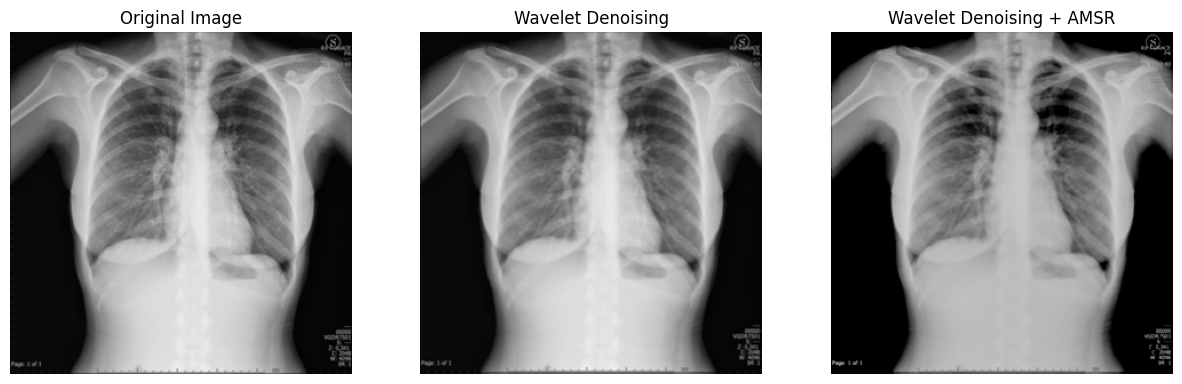

PSNR for COVID-05.png (Wavelet Denoising): 34.27 dB
PSNR for COVID-05.png (Wavelet Denoising + AMSR): 16.55 dB


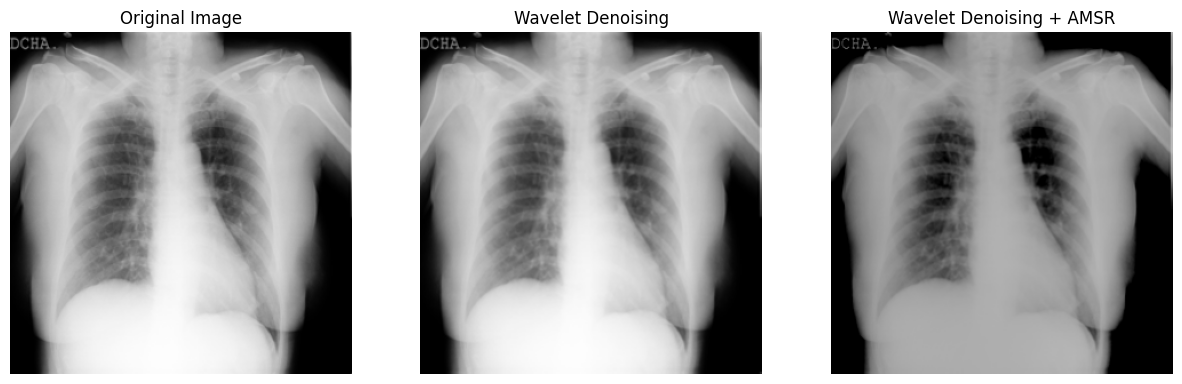

PSNR for COVID-06.png (Wavelet Denoising): 30.78 dB
PSNR for COVID-06.png (Wavelet Denoising + AMSR): 20.37 dB


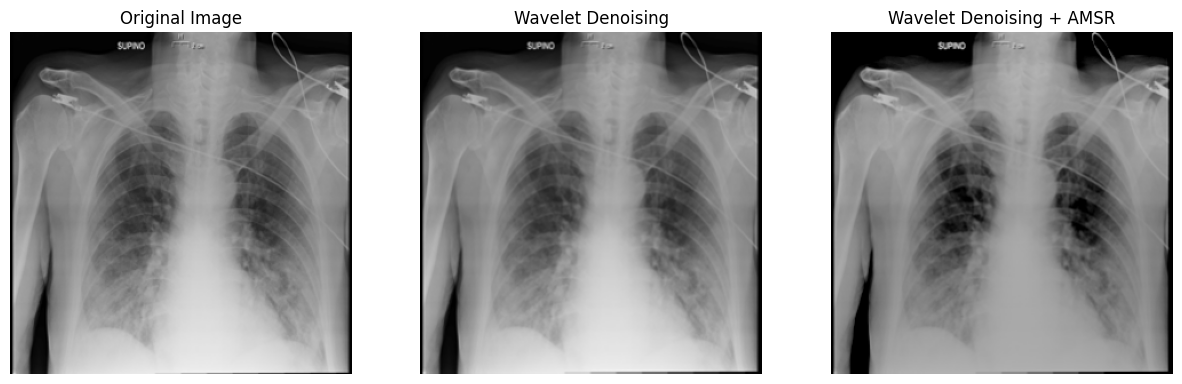

PSNR for COVID-07.png (Wavelet Denoising): 37.59 dB
PSNR for COVID-07.png (Wavelet Denoising + AMSR): 21.22 dB


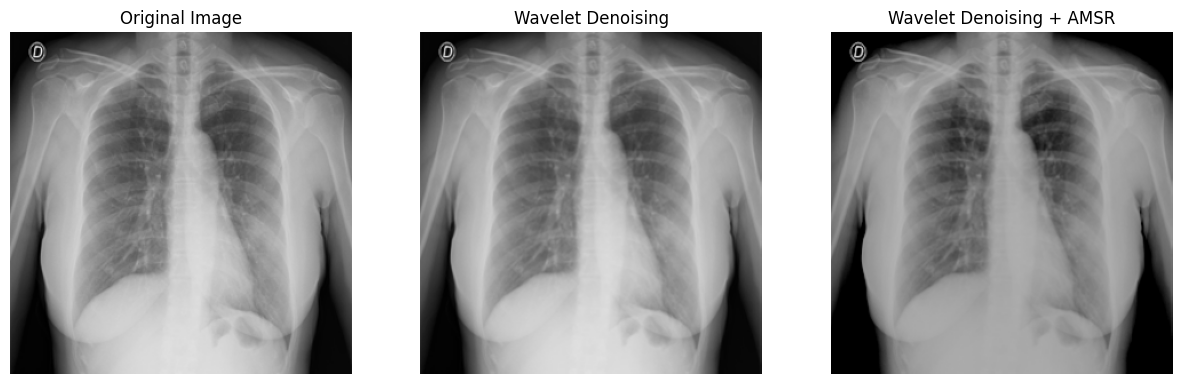

PSNR for COVID-08.png (Wavelet Denoising): 38.62 dB
PSNR for COVID-08.png (Wavelet Denoising + AMSR): 18.11 dB


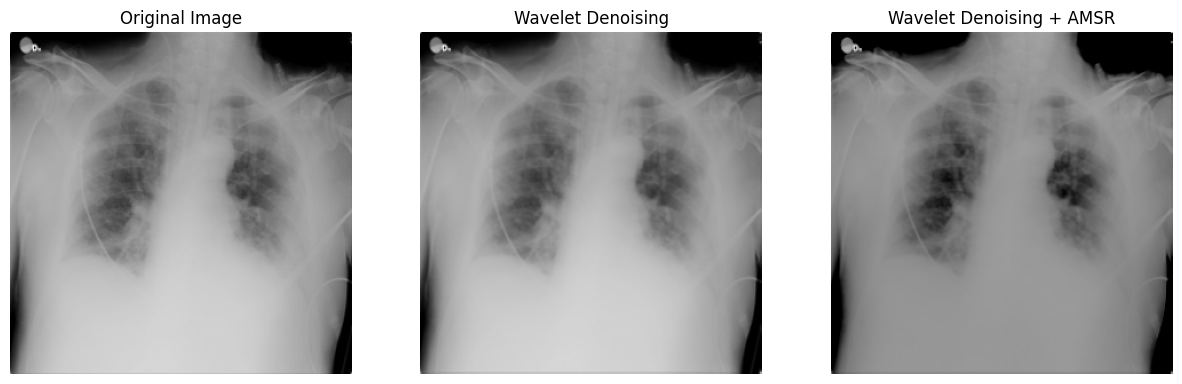

PSNR for COVID-09.png (Wavelet Denoising): 30.78 dB
PSNR for COVID-09.png (Wavelet Denoising + AMSR): 19.33 dB


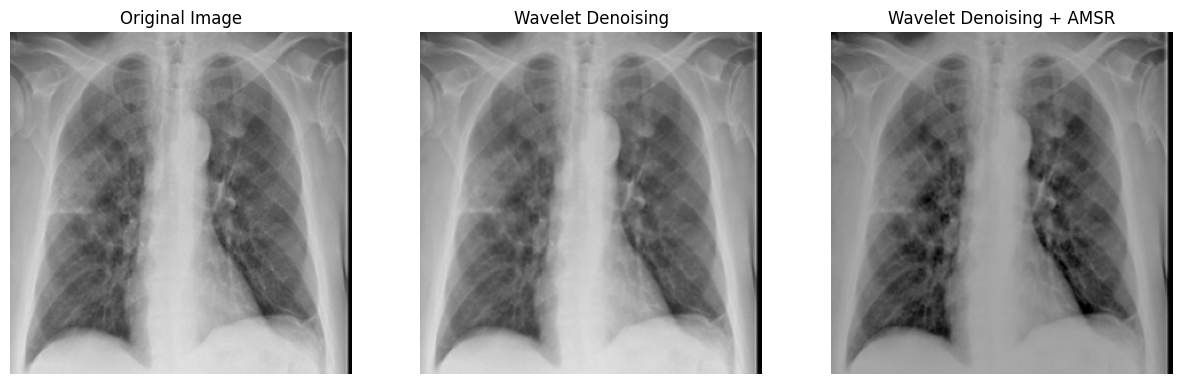

PSNR for COVID-10.png (Wavelet Denoising): 33.49 dB
PSNR for COVID-10.png (Wavelet Denoising + AMSR): 15.09 dB


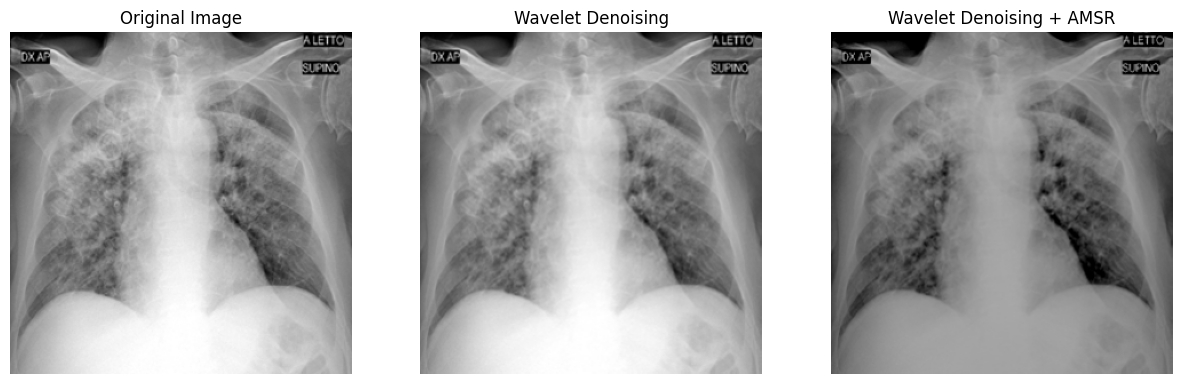

PSNR for Normal-01.png (Wavelet Denoising): 36.19 dB
PSNR for Normal-01.png (Wavelet Denoising + AMSR): 17.81 dB


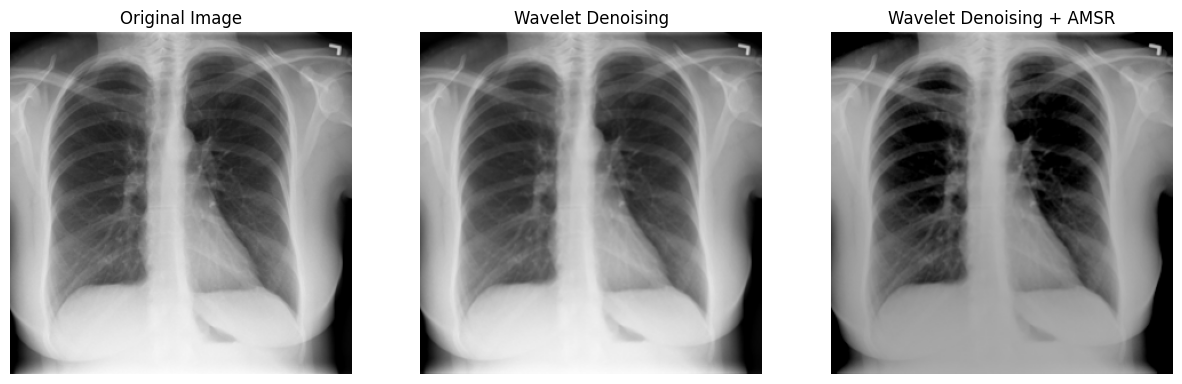

PSNR for Normal-02.png (Wavelet Denoising): 37.27 dB
PSNR for Normal-02.png (Wavelet Denoising + AMSR): 17.32 dB


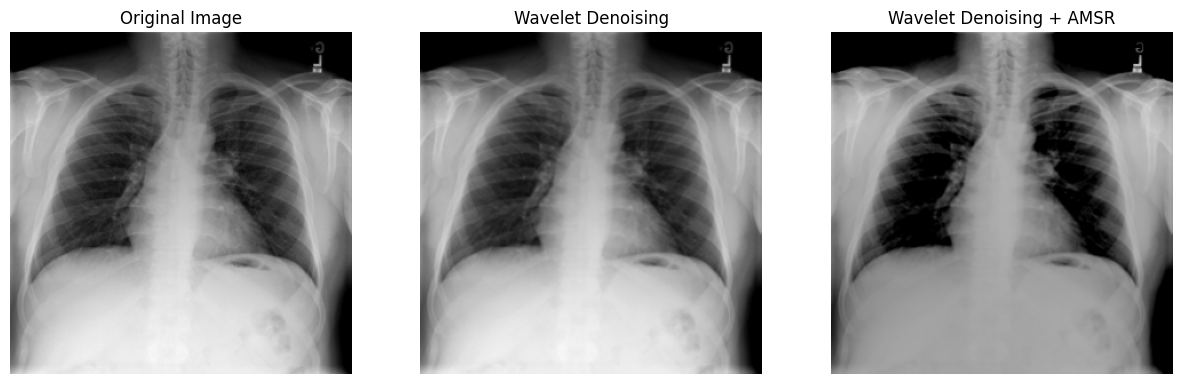

PSNR for Normal-03.png (Wavelet Denoising): 36.70 dB
PSNR for Normal-03.png (Wavelet Denoising + AMSR): 19.43 dB


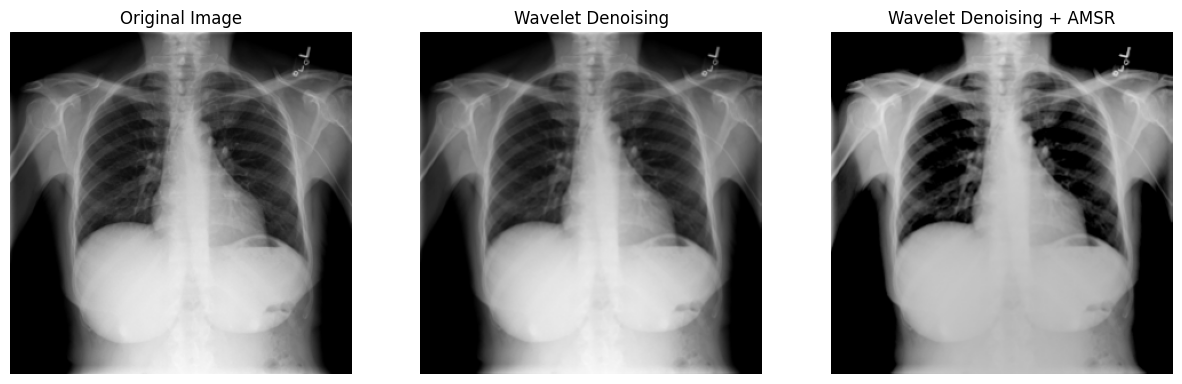

PSNR for Normal-04.png (Wavelet Denoising): 36.90 dB
PSNR for Normal-04.png (Wavelet Denoising + AMSR): 19.98 dB


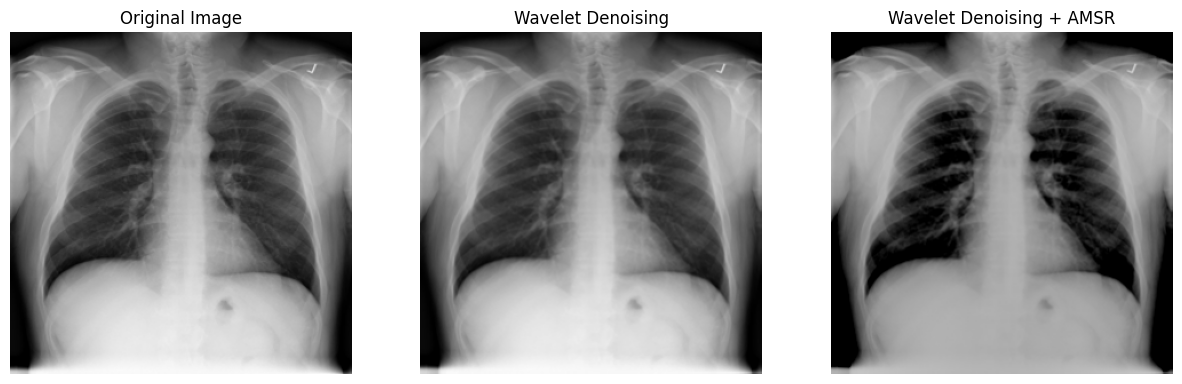

PSNR for Normal-05.png (Wavelet Denoising): 36.07 dB
PSNR for Normal-05.png (Wavelet Denoising + AMSR): 19.07 dB


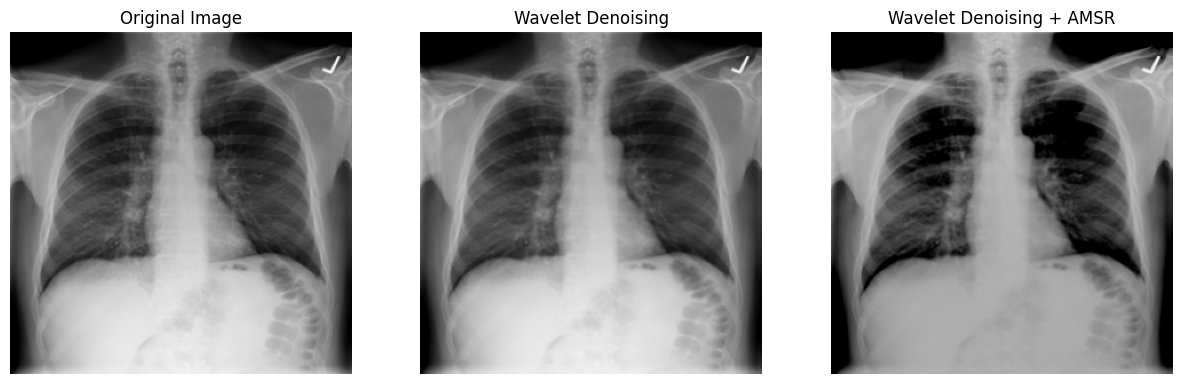

PSNR for Normal-06.png (Wavelet Denoising): 37.26 dB
PSNR for Normal-06.png (Wavelet Denoising + AMSR): 18.12 dB


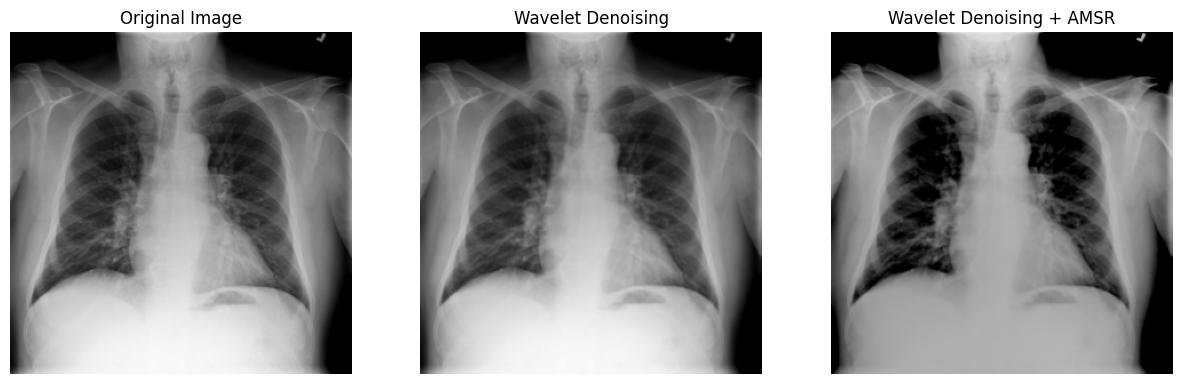

PSNR for Normal-07.png (Wavelet Denoising): 36.16 dB
PSNR for Normal-07.png (Wavelet Denoising + AMSR): 21.19 dB


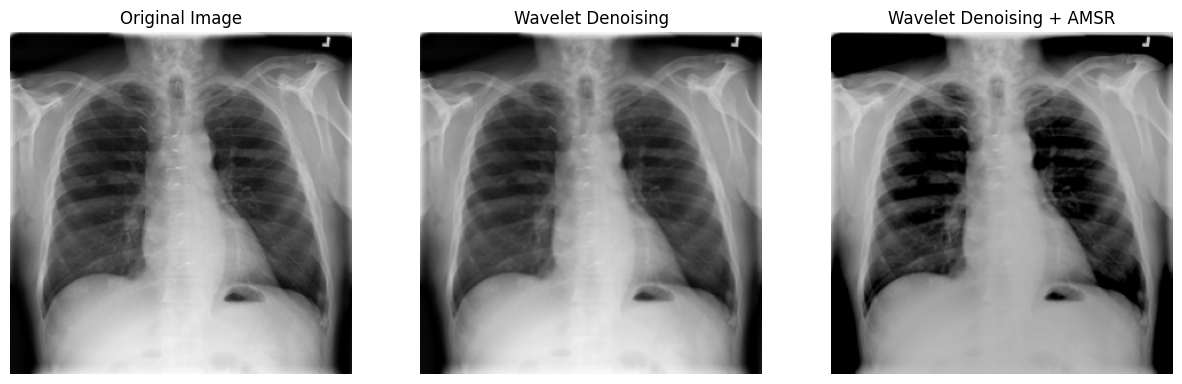

PSNR for Normal-08.png (Wavelet Denoising): 39.20 dB
PSNR for Normal-08.png (Wavelet Denoising + AMSR): 15.50 dB


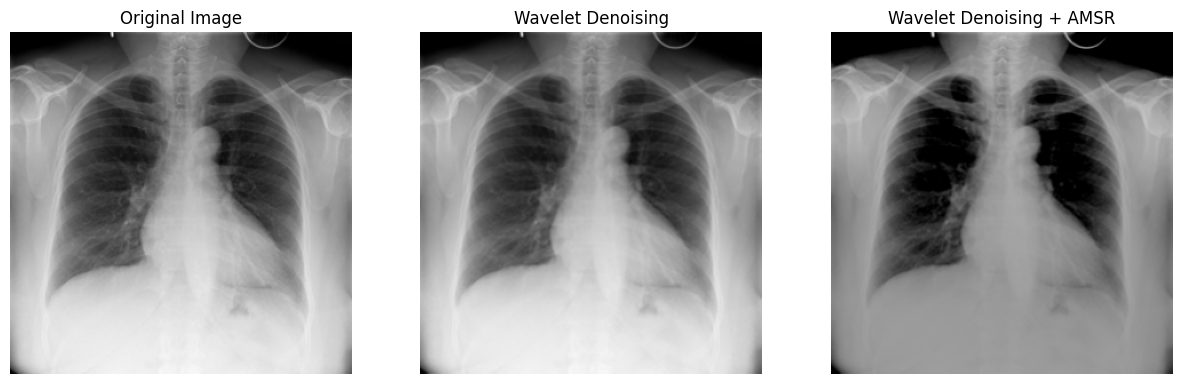

PSNR for Normal-09.png (Wavelet Denoising): 36.61 dB
PSNR for Normal-09.png (Wavelet Denoising + AMSR): 22.55 dB


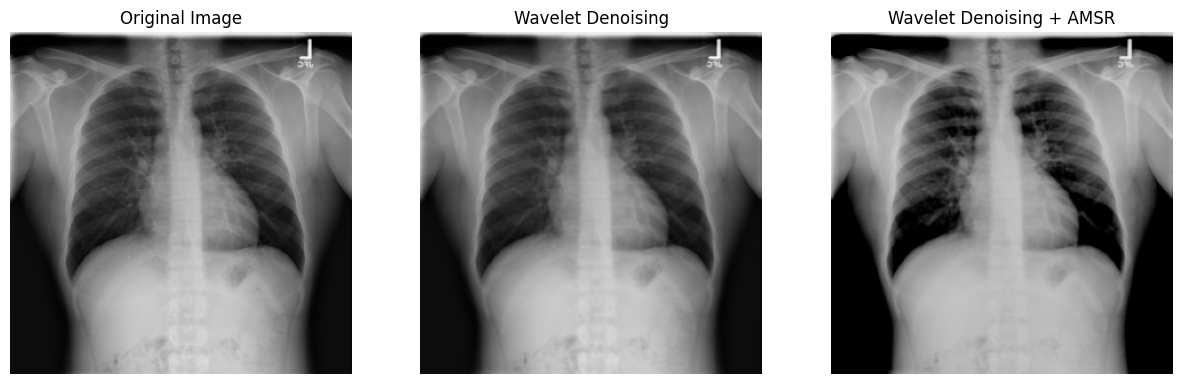

PSNR for Normal-20.png (Wavelet Denoising): 34.87 dB
PSNR for Normal-20.png (Wavelet Denoising + AMSR): 21.53 dB


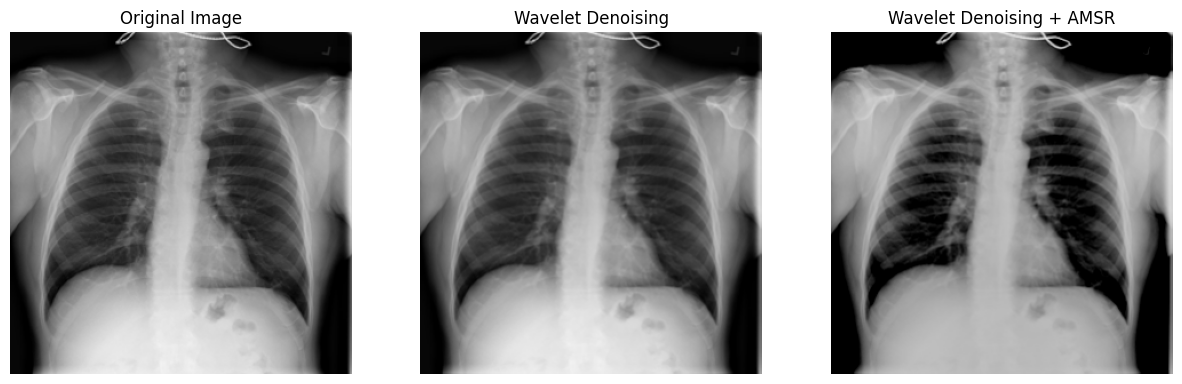

In [141]:
# Memproses setiap gambar dalam direktori
for image_path in glob.glob(os.path.join(input_dir, '*.png')):  # atau '*.png' sesuai dengan ekstensi file Anda
    # Membaca gambar
    image = cv2.imread(image_path)

    # Terapkan Wavelet Denoising
    image_wavelet = wavelet_denoising(image)

    # Terapkan AMSR setelah Wavelet Denoising
    image_wavelet_amsr = apply_amsr(image_wavelet)

    # Resize processed images to match original image size
    image_wavelet = cv2.resize(image_wavelet, (image.shape[1], image.shape[0]))
    image_wavelet_amsr = cv2.resize(image_wavelet_amsr, (image.shape[1], image.shape[0]))

    # Convert processed images to RGB to match the original image shape
    image_wavelet = cv2.cvtColor(image_wavelet, cv2.COLOR_GRAY2BGR)
    image_wavelet_amsr = cv2.cvtColor(image_wavelet_amsr, cv2.COLOR_GRAY2BGR)

    # Menyimpan hasil gambar
    base_name = os.path.basename(image_path)
    wavelet_path = os.path.join(output_dir, f'wavelet_{base_name}')
    amsr_path = os.path.join(output_dir, f'amsr_{base_name}')

    cv2.imwrite(wavelet_path, image_wavelet)
    cv2.imwrite(amsr_path, image_wavelet_amsr)

    # Hitung PSNR
    psnr_wavelet = calculate_psnr(image, image_wavelet)
    psnr_wavelet_amsr = calculate_psnr(image, image_wavelet_amsr)

    # Tampilkan PSNR
    print(f'PSNR for {base_name} (Wavelet Denoising): {psnr_wavelet:.2f} dB')
    print(f'PSNR for {base_name} (Wavelet Denoising + AMSR): {psnr_wavelet_amsr:.2f} dB')
    
    # Tampilkan gambar
    display_images_3col(image, image_wavelet, image_wavelet_amsr)